In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import random
import cv2

%matplotlib inline
np.random.seed(4)

# Dataset


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/ML_HD_C2'

/content/drive/.shortcut-targets-by-id/1SdnBZOzsEir7hBdU_PsKhixJYL4F6ZI4/ML_HD_C2


In [ ]:
training_dir = '/dataset/boneage-training-dataset.zip'
validation_dir1 = '/dataset/boneage-validation-dataset-1.zip'
validation_dir2 = '/dataset/boneage-validation-dataset-2.zip'
test_dir = '/dataset/Test Set Images/'

## Extracting Training Dataset

In [ ]:
import zipfile
import os

current_path = os.getcwd()
zip_path = training_dir
full_path = os.path.join(current_path, zip_path.lstrip('/'))  # lstrip to remove leading slash

with zipfile.ZipFile(full_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

#ground_truth_path_name = file_list[0]
training_images_path_names = file_list[1:]

print("Number of files in the training zip:", len(file_list))


Number of files in the training zip: 12612


In [ ]:
output_dir = '/content/training_dataset_subset'
with zipfile.ZipFile(full_path, 'r') as zip_ref:
    for file in training_images_path_names:
        zip_ref.extract(file, output_dir)


## Extracting Validation Dataset

In [ ]:
zip_path = validation_dir1
full_path = os.path.join(current_path, zip_path.lstrip('/'))  # lstrip to remove leading slash

with zipfile.ZipFile(full_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

validation_images_path_names_1 = file_list[0:]

print("Number of files in the validation-1.zip:", len(file_list))


Number of files in the validation-1.zip: 801


In [ ]:
output_dir = '/content/validation_dataset_subset'
with zipfile.ZipFile(full_path, 'r') as zip_ref:
    for file in validation_images_path_names_1:
        zip_ref.extract(file, output_dir)


In [ ]:
zip_path = validation_dir2
full_path = os.path.join(current_path, zip_path.lstrip('/'))  # lstrip to remove leading slash

with zipfile.ZipFile(full_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

validation_images_path_names_2 = file_list[0:]

print("Number of files in the validation-2.zip:", len(file_list))


Number of files in the validation-2.zip: 626


In [ ]:
output_dir = '/content/validation_dataset_subset'
with zipfile.ZipFile(full_path, 'r') as zip_ref:
    for file in validation_images_path_names_2:
        zip_ref.extract(file, output_dir)


## Extracting Test Dataset

In [ ]:
test_path = test_dir
full_path = os.path.join(current_path, test_path.lstrip('/'))  # lstrip to remove leading slash
test_files = None
if os.path.exists(full_path):
    # List all files in the directory
    file_list = os.listdir(full_path)

    # Filter image files by their extensions (e.g., .jpg, .png, .jpeg)
    image_extensions = ('.png')
    image_files = [file for file in file_list if file.lower().endswith(image_extensions)]
    test_files = image_files
    # Count the number of image files
    print("Number of image files in the test directory:", len(image_files))
else:
    print("The directory does not exist!")

Number of image files in the test directory: 200


In [ ]:
import os
import shutil

test_path = test_dir
full_path = os.path.join(current_path, test_path.lstrip('/'))  # lstrip to remove leading slash

# Define the destination directory in Colab local storage
local_directory = '/content/test_dataset_subset/'

# Ensure the local directory exists
if not os.path.exists(local_directory):
    os.makedirs(local_directory)

# Copy image files from Google Drive to Colab's local storage
image_extensions = ('.png')
for file_name in os.listdir(full_path):
    if file_name.lower().endswith(image_extensions):  # Filter only image files
        full_source_path = os.path.join(full_path, file_name)
        full_dest_path = os.path.join(local_directory, file_name)
        shutil.copy(full_source_path, full_dest_path)

print(f"Images successfully copied to: {local_directory}")


Images successfully copied to: /content/test_dataset_subset/


# EDA

#### Checking Image Dimensions for consistency


In [ ]:
training_dir = '/content/training_dataset_subset'
validation_dir1 = '/content/validation_dataset_subset'
validation_dir2 = '/content/validation_dataset_subset'
test_dir = '/content/test_dataset_subset'
validation_images_path_names_1 = validation_images_path_names_1[1:]
validation_images_path_names_2 = validation_images_path_names_2[1:]

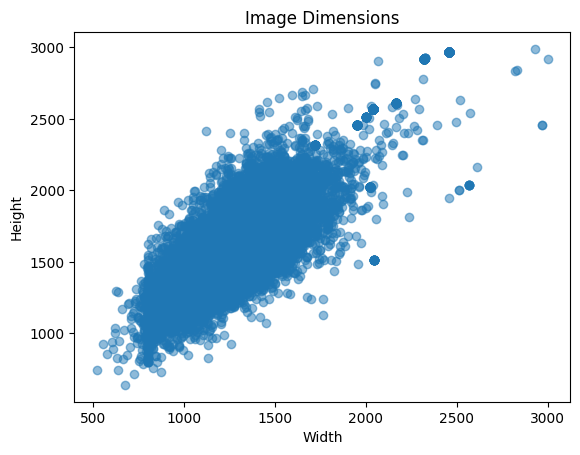

Min Width: 521 Max Width: 3001
Min Height: 640 Max Height: 2989


In [ ]:
from PIL import Image
dimensions = []
for file in training_images_path_names:
    joined_path = os.path.join(training_dir, file)
    with Image.open(joined_path) as img:
        dimensions.append(img.size)
widths, heights = zip(*dimensions)
plt.scatter(widths, heights, alpha=0.5)
plt.title("Image Dimensions")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

print("Min Width:", min(widths), "Max Width:", max(widths))
print("Min Height:", min(heights), "Max Height:", max(heights))

Above plot shows that we need to standardise the image size in preprocessing part.

#### Image Color Analysis

In [ ]:
from collections import Counter
color_modes = []

for file in training_images_path_names:
    joined_path = os.path.join(training_dir, file)
    with Image.open(joined_path) as img:
        color_modes.append(img.mode)

print("Color Modes:", Counter(color_modes))

Color Modes: Counter({'L': 12611})


Above result shows us all the images are Grey Scale, no need to standardize

#### Image Pixel Densities

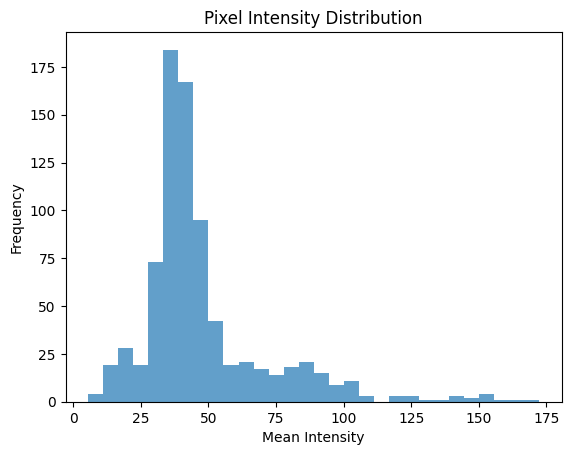

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

pixel_means = []
for file in validation_images_path_names_1[1:]:
    joined_path = os.path.join(validation_dir1, file)
    with Image.open(joined_path) as img:
        pixel_means.append(np.array(img).mean())

plt.hist(pixel_means, bins=30, alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Mean Intensity")
plt.ylabel("Frequency")
plt.show()

Above histogram shows us inconsistencies, that will require us normalization for pixels to standard range in preprocessing part.


#### Image Augmentation Feasibility


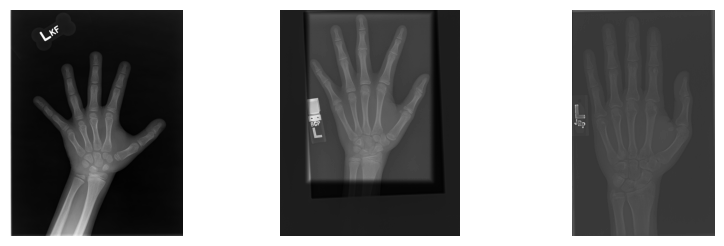

In [ ]:
import matplotlib.pyplot as plt

sample_images = random.sample(validation_images_path_names_1, 3)
plt.figure(figsize=(10, 10))
for i, file in enumerate(sample_images):
    with Image.open(os.path.join(validation_dir1, file)) as img:
        plt.subplot(3, 3, i + 1)
        #plot greyscale image

        plt.imshow(img,cmap='gray')
        plt.axis("off")
plt.show()

Above, we printed some mri images from the dataset. As observed, the images are taken from completely non-uniform distances, quality of the images (and contrast) differ significantly, and the hands are with different rotation angles. This can introduce skewness in data. Zoom and rotation seems crucial in preprocessing stage.


# Preprocessing


## Preprocessing Functions

In [ ]:
import cv2


# Function to apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def clahe_enhancement(img):

    # Create a CLAHE object with default parameters
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img)  # Apply CLAHE

    # Return the enhanced image
    return img_clahe

def rescale_image(image, resolution, interpolation=cv2.INTER_LINEAR):

    if not isinstance(resolution, (tuple, list)) or len(resolution) != 2:
        raise ValueError("Resolution must be a tuple or list with two elements: (width, height).")

    rescaled_image = cv2.resize(image, resolution, interpolation=interpolation)
    return rescaled_image

## Clahe test

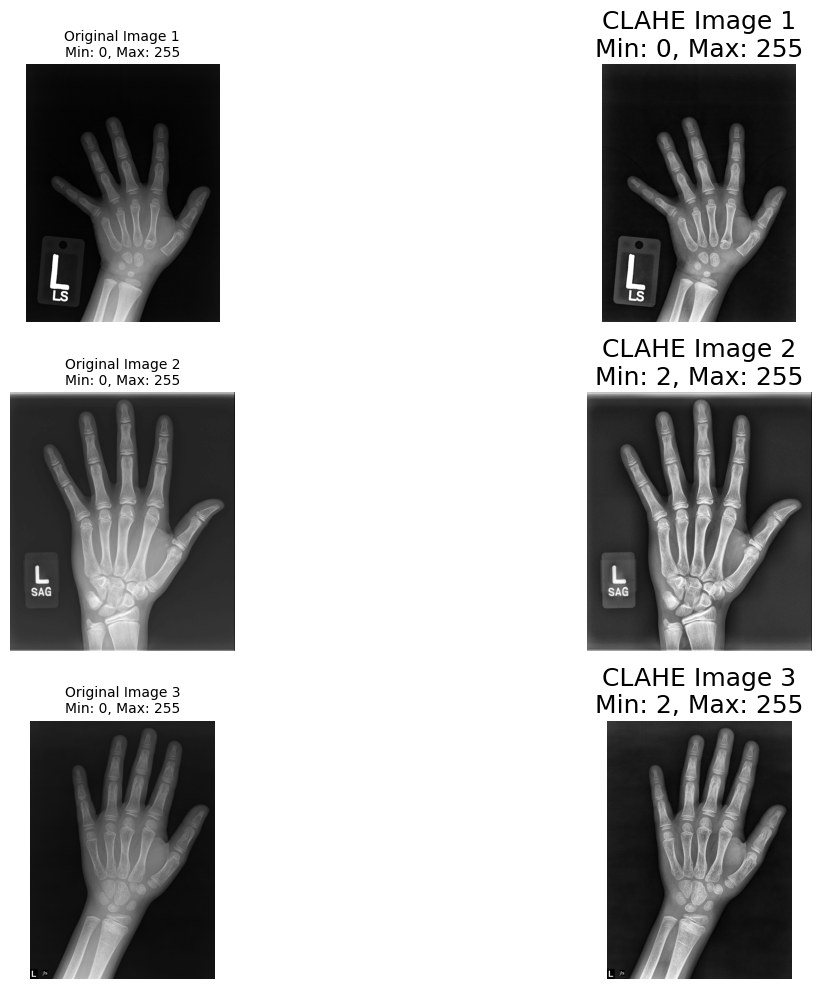

In [ ]:
num_examples = 3
random_indices = random.sample(range(len(training_images_path_names)), num_examples)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    path = os.path.join(training_dir, training_images_path_names[idx])
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Check min and max pixel values of the original image
    original_min = image.min()
    original_max = image.max()

    # Apply CLAHE enhancement
    clahe_image = clahe_enhancement(image)

    # Check min and max pixel values of the CLAHE-transformed image
    clahe_min = clahe_image.min()
    clahe_max = clahe_image.max()

    # Display Original Image
    plt.subplot(num_examples, 2, 2 * i + 1)  # Plot in the odd-indexed subplot
    plt.title(f"Original Image {i + 1}\nMin: {original_min}, Max: {original_max}", fontsize=10)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Display CLAHE Transformed Image
    plt.subplot(num_examples, 2, 2 * i + 2)  # Plot in the even-indexed subplot
    plt.title(f"CLAHE Image {i + 1}\nMin: {clahe_min}, Max: {clahe_max}",fontsize=18)
    plt.imshow(clahe_image, cmap='gray')
    plt.axis('off')


plt.tight_layout()
plt.show()


## Advanced Preprocessing

In [ ]:
#create a function to find peaks in the image

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Function to find peaks
def find_peaks(arr, width=3, min_amount=200):
    peaks = []
    for i in range(1, len(arr)):
        if arr[i] > min_amount and all(arr[i] >= x for x in arr[max(0, i - width // 2):min(len(arr), i + 1 + width // 2)]):
            peaks.append((i, arr[i]))
    return peaks

# Function to find valleys
def find_valleys(histogram, peaks):
    valleys = []
    previous = peaks[0][0]
    for pos, _ in peaks[1:]:
        sublist = histogram[previous:pos]
        valley = sublist.argmin() + previous
        valleys.append((valley, histogram[valley]))
        previous = pos
    return valleys
def detect_peaks_valleys(image, plot=True):

    # Compute the histogram
    hist, bins = np.histogram(image.ravel(), 256, [0, 255])

    # Smooth the histogram
    smooth = np.convolve(hist, np.ones((5,)) / 5, mode='same')

    # Detect peaks and valleys
    peaks = find_peaks(smooth, width=9)
    valleys = find_valleys(smooth, peaks)

    # Plot the image and histogram if required
    if plot:
        plt.figure(figsize=(12, 6))

        # Plot the image
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.xticks([])
        plt.yticks([])

        # Plot the original histogram
        plt.subplot(1, 3, 2)
        plt.plot(hist, label="Histogram")
        plt.title("Original Histogram")
        plt.xlim([0, 255])
        plt.xlabel("Pixel Value")
        plt.ylabel("Number of Pixels")
        plt.grid()

        # Plot the smoothed histogram with peaks and valleys
        plt.subplot(1, 3, 3)
        plt.plot(smooth, label="Smoothed Histogram")
        plt.plot([x for x, _ in peaks], [x for _, x in peaks], 'go', label="Peaks")
        plt.plot([x for x, _ in valleys], [x for _, x in valleys], 'ro', label="Valleys")
        plt.title("Smoothed Histogram with Peaks and Valleys")
        plt.xlim([0, 255])
        plt.xlabel("Pixel Value")
        plt.ylabel("Number of Pixels")
        plt.legend()
        plt.grid()

        plt.tight_layout()
        plt.show()

    return peaks, valleys

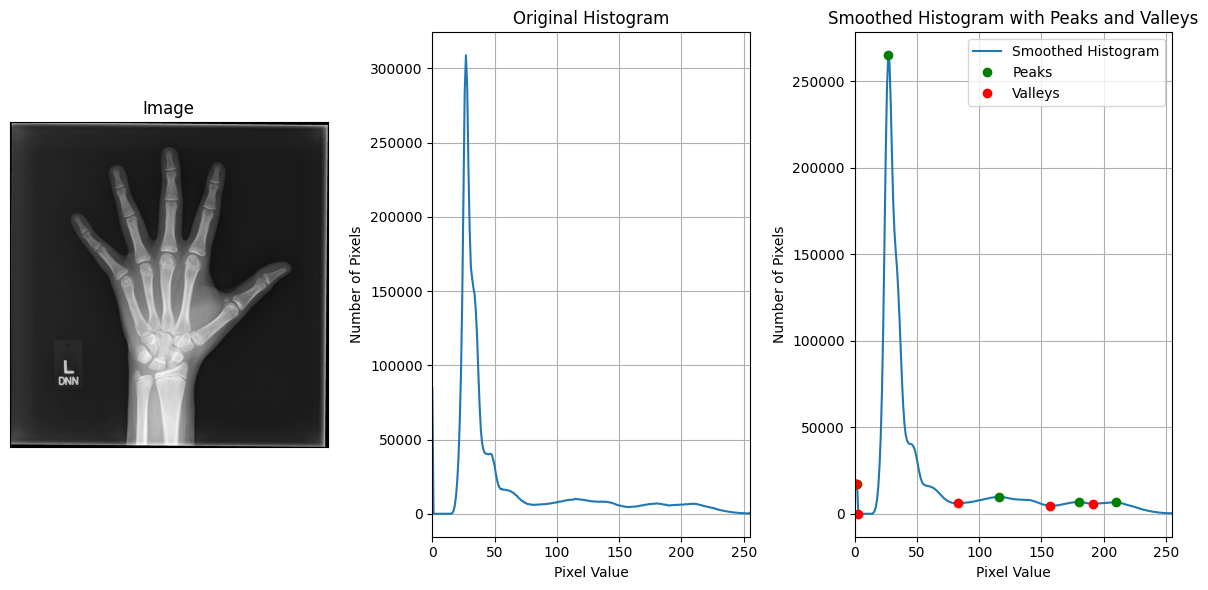

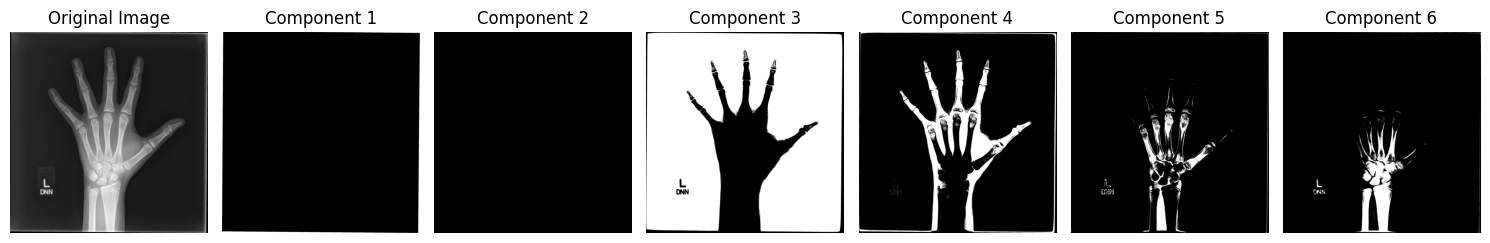

In [ ]:
def segment_image(image, peaks, valleys):
    """
    Segment the image into different components using histogram peaks and valleys.
    """
    # Prepare valley boundaries
    boundaries = [0] + [int(valley[0]) for valley in valleys] + [255]  # Ensure boundaries are integers
    components = []

    # Segment the image based on intensity ranges
    for i in range(len(boundaries) - 1):
        lower, upper = boundaries[i], boundaries[i + 1]
        mask = cv2.inRange(image, lower, upper)  # Create a mask for the current range
        components.append(mask)

    return components


def plot_segmented_components(image, components):
    """
    Plot the original image alongside its segmented components.
    """
    n_components = len(components)
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, n_components + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Segmented components
    for i, component in enumerate(components, start=2):
        plt.subplot(1, n_components + 1, i)
        plt.imshow(component, cmap='gray')
        plt.title(f"Component {i-1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

img_path = os.path.join(training_dir, training_images_path_names[10])
image = cv2.imread(img_path,0)

# Detect peaks and valleys
peaks, valleys = detect_peaks_valleys(image)

# Segment the image into components
components = segment_image(image, peaks, valleys)

# Plot the segmented components
plot_segmented_components(image, components)


In [ ]:
def create_bright_mask(image, peaks,valleys, plot=True):
    # Create a binary mask for pixels within the desired range based on the valleys
    _, bright_mask = cv2.threshold(image, valleys[0][0], 255, cv2.THRESH_TOZERO)
    _, bright_mask = cv2.threshold(bright_mask, valleys[-1][0], 255, cv2.THRESH_TOZERO_INV)
    _, bright_mask = cv2.threshold(bright_mask, valleys[0][0], 255, cv2.THRESH_BINARY)
    # Invert the mask so that the regions we want to keep are white (255) and everything else is black (0)
    inverted_bright_mask = cv2.bitwise_not(bright_mask)

    # Apply the mask to the original image to retain the region of interest
    masked_image = cv2.bitwise_and(image, image, mask=bright_mask)

    # Plot the original image, mask, and the masked result
    if plot:
        plt.figure(figsize=(15, 5))

        # Plot the original image
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original Image")
        plt.xticks([]); plt.yticks([])

        # Plot the binary mask
        plt.subplot(1, 3, 2)
        plt.imshow(bright_mask, cmap='gray')
        plt.title("Binary Mask (Region of Interest)")
        plt.xticks([]); plt.yticks([])

        # Plot the masked image
        plt.subplot(1, 3, 3)
        plt.imshow(masked_image, cmap='gray')
        plt.title("Masked Image (Region of Interest)")
        plt.xticks([]); plt.yticks([])

        plt.tight_layout()
        plt.show()

    return masked_image

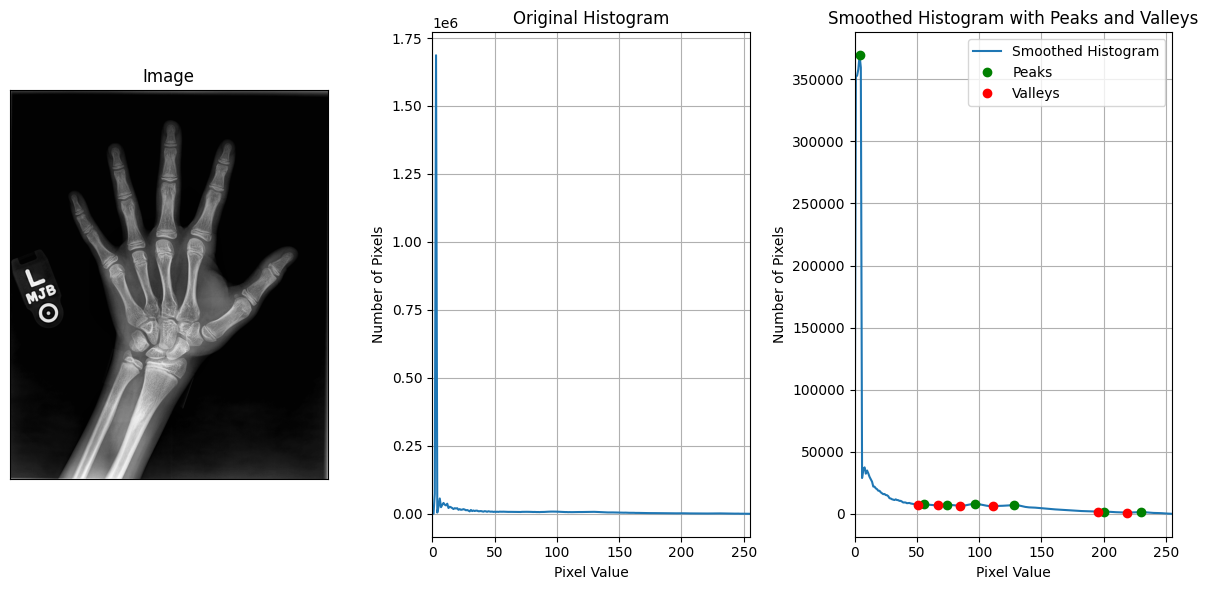

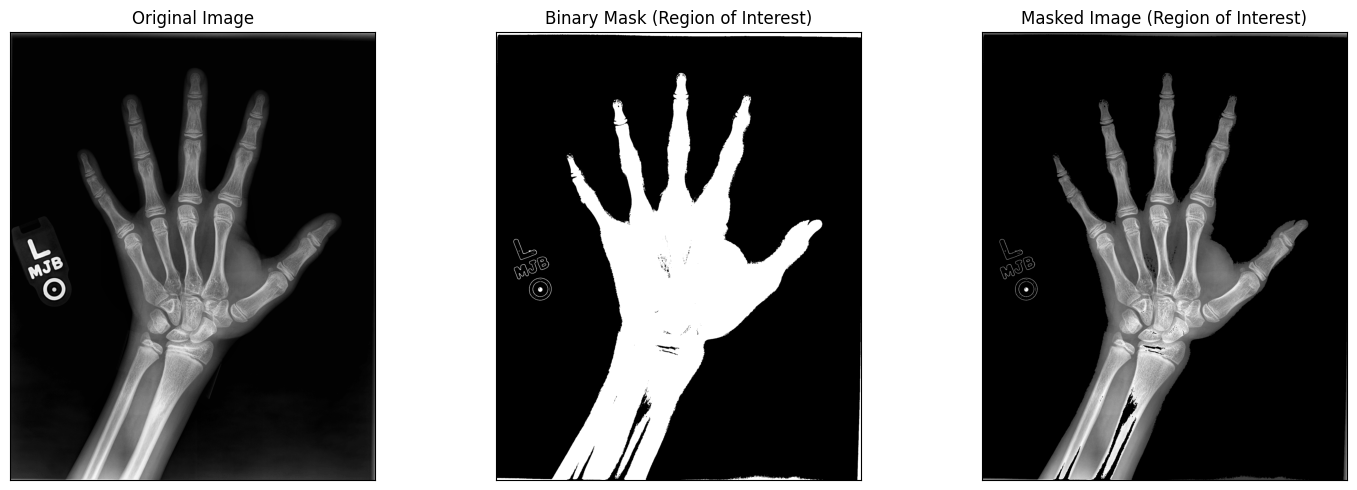

In [ ]:
img_path = os.path.join(training_dir, training_images_path_names[2])
img = cv2.imread(img_path,0)
img = clahe_enhancement(img)
peaks, valleys = detect_peaks_valleys(img,plot = True)
newimg = create_bright_mask(img, peaks, valleys, plot=True)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_contours(image, plot=True):

    # Step 2: Apply a binary threshold to the grayscale image (you can use other methods like Canny if preferred)
    _, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Step 3: Find contours
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Draw contours on the original image (or a copy)
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours with thickness of 2

    # Step 5: Plot the images
    if plot:
        plt.figure(figsize=(15, 5))

        # Plot the original image
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.xticks([]); plt.yticks([])

        # Plot the thresholded image (binary)
        plt.subplot(1, 3, 2)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title("Thresholded Image")
        plt.xticks([]); plt.yticks([])

        # Plot the contour-drawn image
        plt.subplot(1, 3, 3)
        plt.imshow(contour_image)
        plt.title("Image with Contours")
        plt.xticks([]); plt.yticks([])

        plt.tight_layout()
        plt.show()

    return contour_image


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contour(image, min_contour_area=500, plot=True):

    # Step 2: Apply a binary threshold
    _, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Step 3: Find contours
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Filter out small contours based on area
    mask = np.ones_like(image) * 255  # White mask
    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:
            cv2.drawContours(mask, [contour], -1, 0, -1)  # Fill small contours with black

    # Step 5: Apply the mask to the original image
    result_image = cv2.bitwise_and(image, image, mask=mask)

    if plot:
      # Step 6: Plot the images
      plt.figure(figsize=(15, 5))

      # Original image
      plt.subplot(1, 2, 1)
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title("Original Image")
      plt.axis("off")

      # Result image with label removed
      plt.subplot(1, 2, 2)
      plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
      plt.title("Image with Contours Removed")
      plt.axis("off")

      plt.tight_layout()
      plt.show()

    return result_image

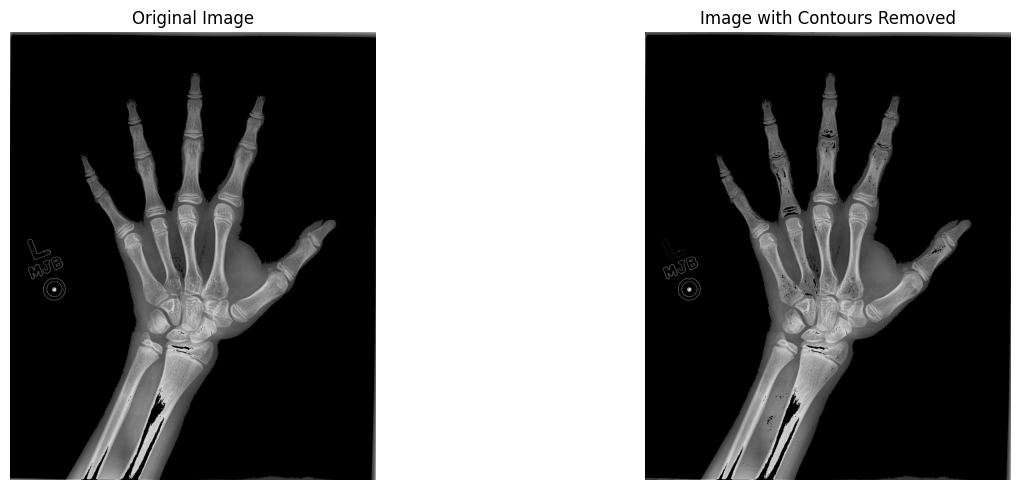

In [ ]:
#apply contours
result = contour(newimg, min_contour_area=500, plot=True)


## Test image normalization


In [ ]:
cropped = cv2.resize(newimg, (256, 256))

In [ ]:
print(newimg.min(),newimg.max())

0 219


# Save

In [ ]:
import os
import cv2

def save_image(image, save_path, filename):

    # Ensure the save directory exists
    if not os.path.exists(save_path):
        os.makedirs(save_path)
        #print(f"Directory created: {save_path}")

    # Full path for the file
    full_path = os.path.join(save_path, filename)

    # Save the image
    res = cv2.imwrite(full_path, image)
    #print(f"Image saved at: {full_path}, result: {res}")

## Saving Preprocessed Training Images

In [ ]:
preprocess_training_raw_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/training_raw"
preprocess_training_clahe_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/training_clahe"
preprocess_training_clahe_masked_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/training_clahe_masked"

In [ ]:
# Define the image directory and filename
for file in training_images_path_names:
  img_path = os.path.join(training_dir, file)
  img = cv2.imread(img_path,0)
  clahe_img = clahe_enhancement(img)
  peaks, valleys = detect_peaks_valleys(img,plot = False)
  newimg = create_bright_mask(img, peaks, valleys, plot=False)

  raw_cropped = cv2.resize(img, (256, 256))
  clahe_cropped = cv2.resize(clahe_img, (256, 256))
  masked_cropped = cv2.resize(newimg, (256, 256))

  filename = file.split('/')[1]

  save_image(raw_cropped,preprocess_training_raw_dir,filename)
  save_image(clahe_cropped,preprocess_training_clahe_dir,filename)
  save_image(masked_cropped,preprocess_training_clahe_masked_dir,filename)

KeyboardInterrupt: 

In [ ]:
#check how many files under the directory
import os
directory_path = "/content/drive/My Drive/ML_HD_C2/preprocess/training_clahe_masked"
num_files = len(os.listdir(directory_path))
print(f"Number of files in the directory: {num_files}")

## Saving Preprocessed Validation Images

In [ ]:
preprocess_validation_raw_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/validation_raw"
preprocess_validation_clahe_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/validation_clahe"
preprocess_validation_clahe_masked_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/validation_clahe_masked"

In [ ]:
for file in validation_images_path_names_1:
  img_path = os.path.join(validation_dir1, file)
  img = cv2.imread(img_path,0)
  clahe_img = clahe_enhancement(img)
  peaks, valleys = detect_peaks_valleys(img,plot = False)
  newimg = create_bright_mask(img, peaks, valleys, plot=False)

  raw_cropped = cv2.resize(img, (256, 256))
  clahe_cropped = cv2.resize(clahe_img, (256, 256))
  masked_cropped = cv2.resize(newimg, (256, 256))

  filename = file.split('/')[1]

  save_image(raw_cropped,preprocess_validation_raw_dir,filename)
  save_image(clahe_cropped,preprocess_validation_clahe_dir,filename)
  save_image(masked_cropped,preprocess_validation_clahe_masked_dir,filename)


In [ ]:
for file in validation_images_path_names_2:
  img_path = os.path.join(validation_dir2, file)
  img = cv2.imread(img_path,0)
  clahe_img = clahe_enhancement(img)
  peaks, valleys = detect_peaks_valleys(img,plot = False)
  newimg = create_bright_mask(img, peaks, valleys, plot=False)

  raw_cropped = cv2.resize(img, (256, 256))
  clahe_cropped = cv2.resize(clahe_img, (256, 256))
  masked_cropped = cv2.resize(newimg, (256, 256))

  filename = file.split('/')[1]

  save_image(raw_cropped,preprocess_validation_raw_dir,filename)
  save_image(clahe_cropped,preprocess_validation_clahe_dir,filename)
  save_image(masked_cropped,preprocess_validation_clahe_masked_dir,filename)


## Saving Preprocessed Test Images

In [ ]:
preprocess_tes_raw_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/test_raw"
preprocess_training_clahe_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/test_clahe"
preprocess_training_clahe_masked_dir = "/content/drive/My Drive/ML_HD_C2/preprocess/test_clahe_masked"

In [ ]:
for file in test_files:
  img_path = os.path.join(test_dir, file)
  img = cv2.imread(img_path,0)
  clahe_img = clahe_enhancement(img)
  peaks, valleys = detect_peaks_valleys(img,plot = False)
  newimg = create_bright_mask(img, peaks, valleys, plot=False)

  raw_cropped = cv2.resize(img, (256, 256))
  clahe_cropped = cv2.resize(clahe_img, (256, 256))
  masked_cropped = cv2.resize(newimg, (256, 256))

  filename = file

  save_image(raw_cropped,preprocess_tes_raw_dir,filename)
  save_image(clahe_cropped,preprocess_training_clahe_dir,filename)
  save_image(masked_cropped,preprocess_training_clahe_masked_dir,filename)
